<a href="https://colab.research.google.com/github/Medhashah03/SYNAPSE_LP/blob/Week-7/NLP_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **NLP Task 2**

## **DJS Synapse Learning Period**
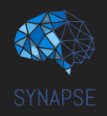

#**Word Embedding**
2 types:


1.   Count or Frequency based (BoW, TF-IDF, One Hot encoding)
2.   Deep Learning Trained models (Word2Vec, Average Word2Vec)

Word2Vec: CBOW, SkipGrams
Resources: https://youtu.be/Z1VsHYcNXDI

In [1]:
!pip install gensim==4.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 59.0 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
import pandas as pd

Dataset link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [3]:
# Load the dataset and delete the latter 2 columns while preprocessing
from google.colab import drive
drive.mount("/content/gdrive")
df = pd.read_csv("/content/gdrive/MyDrive/NLP_dataset/IMDB_Dataset.csv",encoding = "ISO-8859-1")
  
df.head()

Mounted at /content/gdrive


review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
#Add your code here
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corp = []
for i in range(1000):
  sen = df['review'][i]
  words = nltk.word_tokenize(sen)
  l=[]
  for word in words:
    if word not in set(stopwords.words('english')):
      l.append(lemmatizer.lemmatize(word))
  corp.append(l) 
corp

[['One',
  'reviewer',
  'mentioned',
  'watching',
  '1',
  'Oz',
  'episode',
  "'ll",
  'hooked',
  '.',
  'They',
  'right',
  ',',
  'exactly',
  'happened',
  'me.',
  '<',
  'br',
  '/',
  '>',
  '<',
  'br',
  '/',
  '>',
  'The',
  'first',
  'thing',
  'struck',
  'Oz',
  'brutality',
  'unflinching',
  'scene',
  'violence',
  ',',
  'set',
  'right',
  'word',
  'GO',
  '.',
  'Trust',
  ',',
  'show',
  'faint',
  'hearted',
  'timid',
  '.',
  'This',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  ',',
  'sex',
  'violence',
  '.',
  'Its',
  'hardcore',
  ',',
  'classic',
  'use',
  'word.',
  '<',
  'br',
  '/',
  '>',
  '<',
  'br',
  '/',
  '>',
  'It',
  'called',
  'OZ',
  'nickname',
  'given',
  'Oswald',
  'Maximum',
  'Security',
  'State',
  'Penitentary',
  '.',
  'It',
  'focus',
  'mainly',
  'Emerald',
  'City',
  ',',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inwards',
  ',',
  'privacy',
  'high',
  '

##Word2Vec


###CBOW or SkipGram (sg = 0/1) default is CBOW

Word2Vec resources: https://builtin.com/machine-learning/nlp-word2vec-python

In [6]:
import gensim

/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [7]:
model=gensim.models.Word2Vec(corp,window=5,min_count=2)#window, min_count, max_count, size are important hyperparameters

In [8]:
model.wv.most_similar("good") 

[('like', 0.9968566298484802),
 ('It', 0.9964610934257507),
 ('But', 0.9964592456817627),
 ('thing', 0.9961214661598206),
 ('ever', 0.9961149096488953),
 ('one', 0.9958894848823547),
 ('There', 0.9948859810829163),
 ('acting', 0.9947148561477661),
 ('bad', 0.994657039642334),
 ('film', 0.9943751692771912)]

##Average Word2Vec
In average Word2Vec, the model is fed with an average of all the vectors obtained from the vectorization techniques. For eg. in this task, our model will be fed a single array of size Nx1 which is an average vector of all the vectors in the sentence.

In [9]:
def avg_word2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [ ]:
# Train a suitable model using Word2Vec and avg_word2vec and find out it's classification report and accuracy on the given dataset
# Add your code in the following cells

In [ ]:
# Add your code for the Word2Vec model in the following cells

In [10]:
from gensim.models import Word2Vec
import numpy as np
model = Word2Vec(corp,vector_size=100, window=5, min_count=1)
model.train(corp, total_examples=model.corpus_count, epochs=model.epochs)
len(model.wv.index_to_key)

21337

In [11]:
from tqdm import tqdm

In [ ]:
# Add your code for the Average Word2Vec model in the following cells


In [14]:
X = []
for doc in range(1000):
    doc = tqdm(df['review'].values[i])
    X.append(avg_word2vec(doc))



100%|██████████| 3555/3555 [00:01<00:00, 3046.64it/s]


In [17]:
X = np.array(X)
X.shape

(1000, 100)

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(df['sentiment'].head(1000))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.43

#Create your own embedding layer using Keras

Advised to use colab for GPU purposes.

You can use jupyter nb if your PC has a dedicated graphics card.

If using colab, got to the "Runtime" tab and change "Runtime type" to GPU

In [20]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 38.8 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [21]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np

##One-Hot representation

The one-hot library on the input vocabulary size returns an array of integers ranging from 1 to vocabulary size. It indicates the index of the '1' in the one hot representation for the word.

Build sequential models using keras: https://www.youtube.com/watch?v=8uC-WT1LYnU, https://www.youtube.com/watch?v=VGCHcgmZu24

In [26]:
# OH_rep = [one_hot('''sentences''', '''vocabulary size''')] choose a good vocabulary size to avoid out of vocabulary error
# Add your code here
list = df['review'].values
k =[]
for sent in list:
  sen1 =nltk.sent_tokenize(sent)
  sen1=sent.lower()
  k.append(sen1)
OH_rep = [one_hot(words,100000) for words in k] 
print(OH_rep)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
# Padding: 2 types: pre padding, post padding try both
# Wisely select the sentence length to accomodate all sentences with a couple of extra bits to avoid errors.
# Add your code here
sent_length=200
embedded_docs=pad_sequences(OH_rep,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[68234 19542 84283 ... 42854 69201 45856]
 [    0     0     0 ... 68689 14837 45490]
 [    0     0     0 ... 87401 73431 77726]
 ...
 [69409 86169 15541 ... 26097 27540 15749]
 [73431 72823 17906 ... 76159 15207 12621]
 [    0     0     0 ...  8447 80701 89506]]


In [30]:
# select your feature dimensions: 5 for very small datasets, 10 is generally a good choice
dim=10
model=Sequential()
model.add(Embedding(100000,dim,input_length=sent_length))
model.compile('adam','mse')

In [ ]:
# Create a sequential model with an embedding layer with the appropriate vocabulary size and the decided sentence length
# Use an appropriate optimizer 'adam' and loss function 'mse' to compile your model
# Add your code here


# **Plotting Embeddings**
T-distributed Stochastic Neighbor Embedding



Let's now visualize some of our embeddings. To plot embeddings with a dimensionality of 100 or more, we first need to map them to a dimensionality of 2. We do this with the popular [t-SNE](https://lvdmaaten.github.io/tsne/) method. T-SNE, short for t-distributed Stochastic Neighbor Embedding, helps us visualize high-dimensional data by mapping similar data to nearby points and dissimilar data to distance points in the low-dimensional space.

T-SNE is present in [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). To run it, we just have to specify the number of dimensions we'd like to map the data to ('n_components'), and the similarity metric that t-SNE should use to compute the similarity between two data points ('metric'). We're going to map to 2 dimensions and use the cosine as our similarity metric. Additionally, we use PCA as an initialization method to remove some noise and speed up computation. The [Scikit-learn user guide](https://scikit-learn.org/stable/modules/manifold.html#t-sne) contains some additional tips for optimizing performance. 

Plotting all the embeddings in our vector space would result in a very crowded figure where the labels are hardly legible. Therefore we'll focus on a subset of embeddings by selecting the 200 most similar words to a target word.

Intuition to how TSNE works: https://youtu.be/NEaUSP4YerM

In [31]:
# will take some time to run
model = gensim.models.Word2Vec(corp, min_count=100, window=5, vector_size=100)


In [33]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
target_word= 'good'
# Selecting the top 200 similar words for plotting
selected_words = [w[0] for w in model.wv.most_similar(positive=[target_word], topn=200)] + [target_word]
embeddings = [model.wv[w] for w in selected_words] + model.wv[target_word]

mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


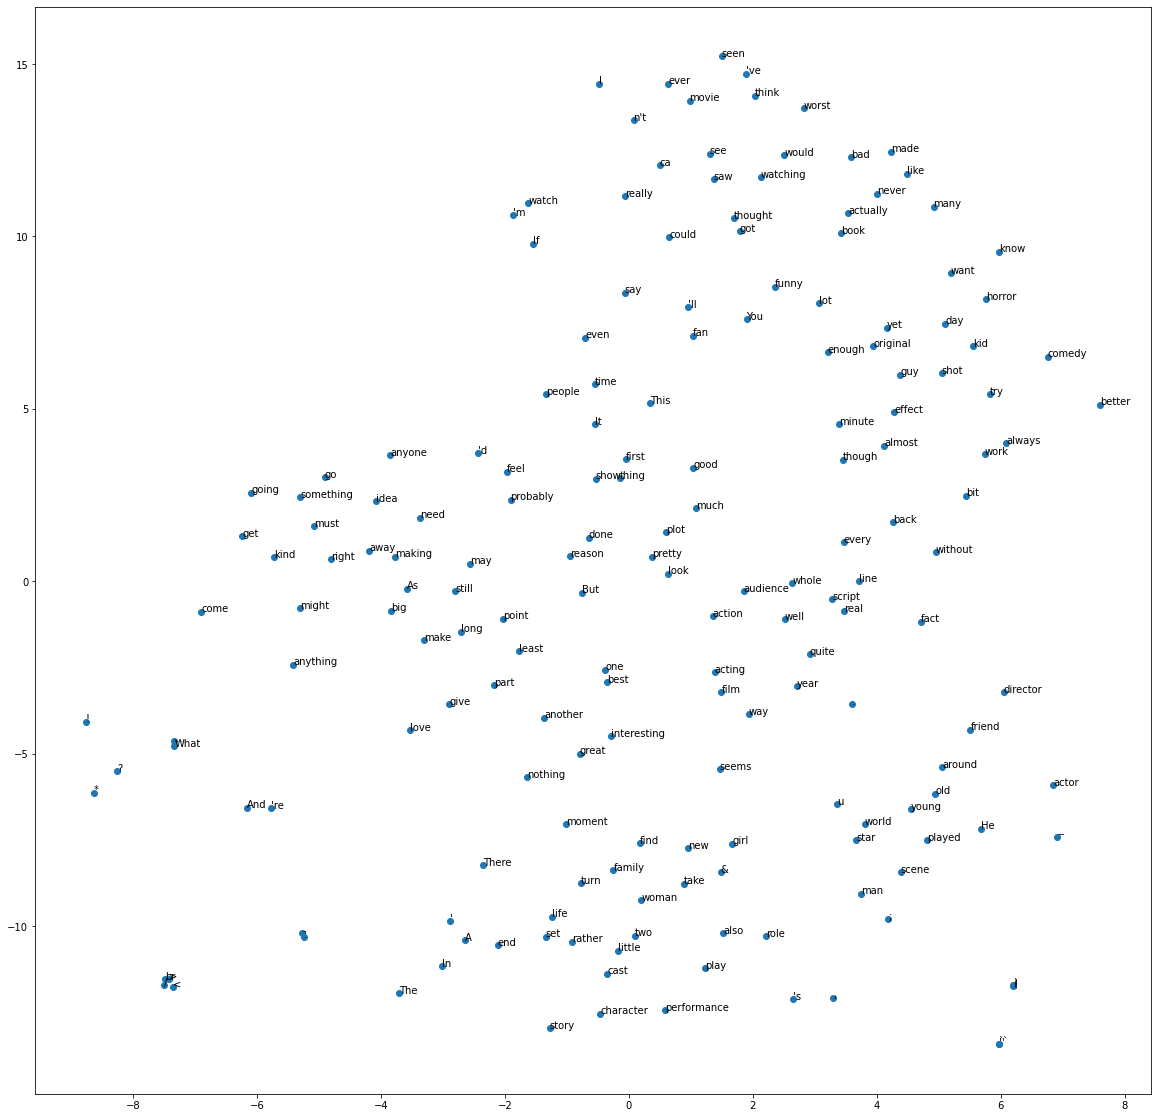

In [34]:
plt.figure(figsize=(20,20))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y)

for i, txt in enumerate(selected_words):
    plt.annotate(txt, (x[i], y[i]))